In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Дерева рішень

### Тренування та візуалізація

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

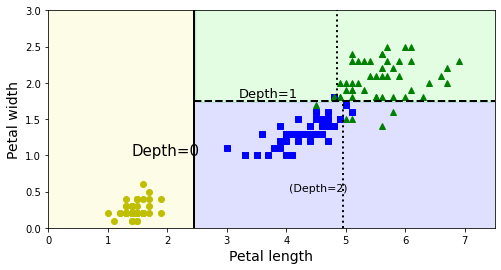

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [4]:
### альтернатива https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

#from graphviz import Source
#from sklearn.tree import export_graphviz

#dot_data = export_graphviz(
#        tree_clf,
#        out_file= None, #"iris_tree.dot",
#        feature_names=iris.feature_names[2:],
#        class_names=iris.target_names,
#        rounded=True,
#        filled=True
#    )

#Source(dot_data)

### Перенавчання дерев

In [5]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

In [6]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

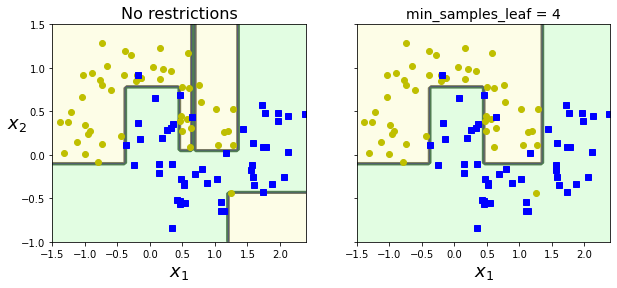

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

### Нестійкість до повороту

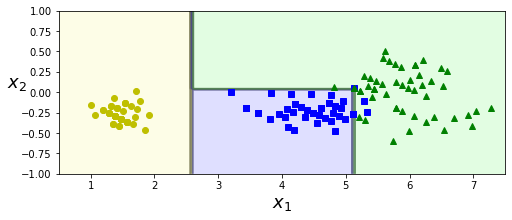

In [8]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

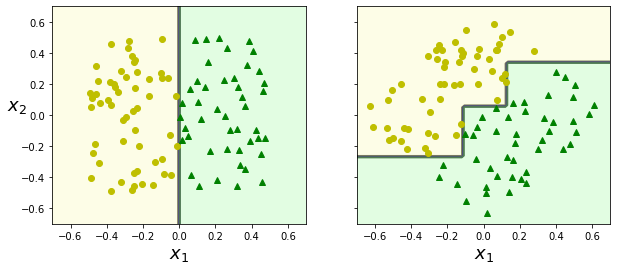

In [9]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

# Дерева регресії

In [10]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

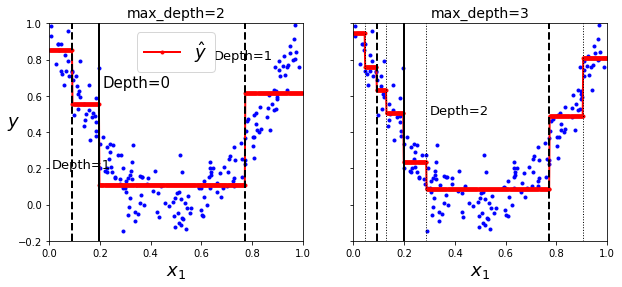

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

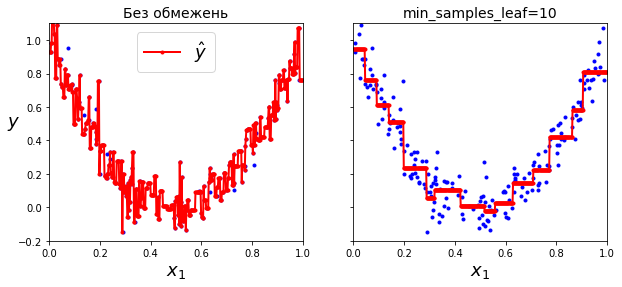

In [13]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Без обмежень", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Bagging ensembles

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [17]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

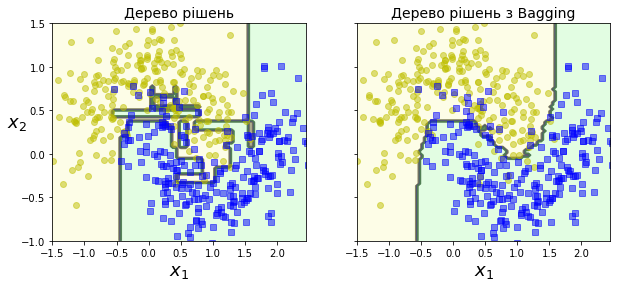

In [19]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Дерево рішень", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Дерево рішень з Bagging", fontsize=14)
plt.ylabel("")
plt.show()

# Random Forests

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

In [21]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [23]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # майже однакові виходи моделей

0.976

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [25]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

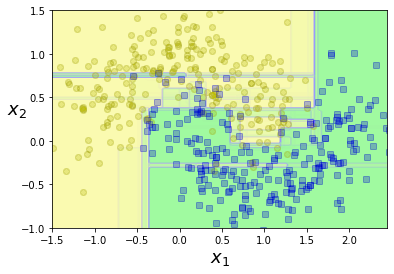

In [26]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

# Ансамбль методом голосування

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

Жорстке голосування:

In [29]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [30]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [31]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


М'яке голосування:

In [32]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [33]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Завдання

_Вправа 1: натренуйте модель дерева рішень та виконайте пошук гіперпараметрів для moons dataset._ \
a. Згенеруйте датасет, використовуючи функцію `make_moons(n_samples=10000, noise=0.4)`. \
b. Розбийте її на тренувальну та тестувальну частини, використовуючи функцію `train_test_split()`. \
c. Використайте пошук з крос-валідацією (`GridSearchCV`, `RandomizedSearchCV`) для пошуку гіперпараметрів моделі `DecisionTreeClassifier`. Зокрема, спробуйте різні значення для параметра `max_leaf_nodes`.

In [34]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

In [35]:
X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)

In [36]:
search_params = {
    'criterion': ('gini', 'entropy'),
    'max_depth': [i for i in range(1, 180)],
    'min_samples_split': [i for i in range(2, 6)],
    'min_samples_leaf': [i for i in range(1, 6)],
    'max_features': uniform(loc=0.1, scale =0.9),
    'max_leaf_nodes': [i for i in range(2, 100)],
    'min_impurity_decrease': uniform(loc=0, scale =4),
    'class_weight': [{0: alpha, 1: 1-alpha} for alpha in np.arange(0.1, 1, 0.01)]
}

rs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), 
    search_params,
    n_iter = 100000,
    scoring = 'accuracy',
    n_jobs = -1,
    cv=5,
    verbose=2,
    random_state=42,
    
)
rs.fit(X_train, y_train)
print('Best score:', rs.best_score_)
print('Obtained with:', rs.best_estimator_)

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11852 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 29964 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 53324 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 81804 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 115532 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 154380 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 198476 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 247692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 302156 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 361740 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 426572 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 496524 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: 

Best score: 0.8527142857142858
Obtained with: DecisionTreeClassifier(class_weight={0: 0.5899999999999997,
                                     1: 0.41000000000000025},
                       criterion='entropy', max_depth=104,
                       max_features=0.7001959965379658, max_leaf_nodes=75,
                       min_impurity_decrease=0.002477982839867998,
                       random_state=42)


_Вправа 2_ : \
a. Завантажте датасет MNIST та розбийте його на тренувальну, валідаційну та тестувальну частини (наприклад, 50 000 / 10 000 / 10 
000). \
b. Натренуйте різні класифікаційні моделі (Random Forest classifier, Logistic Regression, SVM). \
c. Далі, об'єднайте їх за допомогою голосування. \
d. Натренуйте нову модель, використовуючи виходи попередніх моделей на валідаційній вибірці (це будуть нові ознаки і нова тренувальна вибірка для даної моделі). Протестуйте отриманий ланцюжок на тренувальний вибірці. Такий спосіб поєднання моделей називається стогуванням (stacking).  

In [37]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, )

In [41]:
y = y.astype(int)

In [42]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:60000], y[50000:60000]
X_test, y_test = X[60000:], y[60000:]

In [43]:
X_stack = np.empty((X_val.shape[0], 4))

In [44]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [45]:
rf = RandomForestClassifier(
    n_estimators=100,max_depth=30,
#     min_samples_split=4,
    random_state=42, n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

In [46]:
X_stack[:, 0] = rf.predict(X_val)
print('Accuracy:', np.mean(X_stack[:, 0]==y_val))

Accuracy: 0.973


In [47]:
logreg = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(n_jobs = -1, solver = 'lbfgs'))])
logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(n_jobs=-1))])

In [48]:
X_stack[:, 1] = logreg.predict(X_val)
print('Accuracy:', np.mean(X_stack[:, 1]==y_val))

Accuracy: 0.9249


In [57]:
svm_params = {'kernel': 'rbf', 'gamma': 0.0012755102040816326, 'C': 5}
svm = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(**svm_params,probability=True,max_iter=1000))])
svm.fit(X_train, y_train)

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=5, gamma=0.0012755102040816326, max_iter=1000,
                     probability=True))])

In [58]:
X_stack[:, 2] = svm.predict(X_val)
print('Accuracy:', np.mean(X_stack[:, 2]==y_val))

Accuracy: 0.9751


In [59]:
voting_clf = VotingClassifier(
    estimators=[('logreg', logreg), ('rf', rf), ('svm', svm)],
    voting='soft',
    n_jobs=-1,
    verbose=True,
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('logreg',
                                               LogisticRegression(n_jobs=-1))])),
                             ('rf',
                              RandomForestClassifier(max_depth=30, n_jobs=-1,
                                                     random_state=42)),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(C=5,
                                                   gamma=0.0012755102040816326,
                                                   max_iter=1000,
                                                   probability=True))]))],
                 n_jobs=-1, verbose=True, voting='soft')

In [61]:
X_stack[:, 3] = voting_clf.predict(X_val)
print('Accuracy:', np.mean(X_stack[:, 3]==y_val))

Accuracy: 0.9704


In [103]:
X_stack_val = []
X_stack_test = []
for i, clf in enumerate([rf, logreg, svm, voting_clf]):
    X_stack_val.append(clf.predict_proba(X_val))
    X_stack_test.append(clf.predict_proba(X_test))
    print(clf.__class__.__name__, accuracy_score(y_test, X_stack_test[i].argmax(axis=1)))

RandomForestClassifier 0.9691
Pipeline 0.9225
Pipeline 0.9717
VotingClassifier 0.9667


First pipeline is Logistic Regression and the second one is SVM (pipelines are used to use standart scaler before fitting model)

In [106]:
X_stack_val = np.concatenate(X_stack_val, axis=1)
X_stack_test = np.concatenate(X_stack_test, axis=1)

In [108]:
stack_clf = RandomForestClassifier(n_estimators=100, random_state=42)
stack_clf.fit(X_stack_val, y_val)

RandomForestClassifier(random_state=42)

In [111]:
print('Accuracy', np.mean(stack_clf.predict(X_stack_test)==y_test))

Accuracy 0.9764


I used classes probabilities for stacking model, not predictions themselves. Class predictions gave me worse performance then SVM, so I decided to do stacking this way.